<a href="https://colab.research.google.com/github/EpicDuque/ml-nnhandrwiting/blob/master/ML_Handwriting_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)


2.2.0


In [14]:
handwrite_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = handwrite_mnist.load_data()

labels = []
for i in range(0, 10):
  labels.append(i)


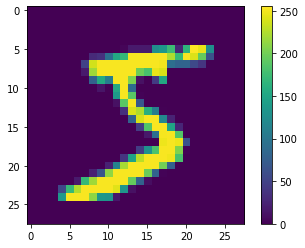

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0


TRAINING DATA AND LABELS:


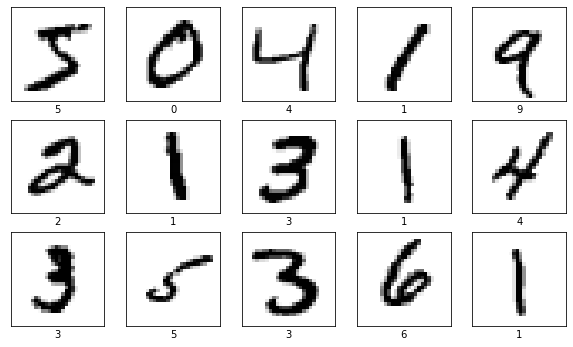

In [17]:
print('TRAINING DATA AND LABELS:')
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

plt.show()


In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [21]:
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0100 - accuracy: 0.9968
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0071 - accuracy: 0.9980
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0079 - accuracy: 0.9974
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0061 - accuracy: 0.9982
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0062 - accuracy: 0.9980
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0055 - accuracy: 0.9984
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0054 - accuracy: 0.9982


TEST DATA:


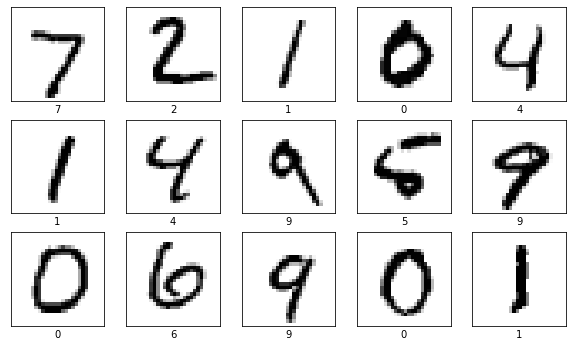

In [22]:
print('TEST DATA:')
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])

plt.show()

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.1041 - accuracy: 0.9804

Test accuracy: 0.980400025844574


In [24]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

MODEL PREDICTIONS ON TEST DATA:


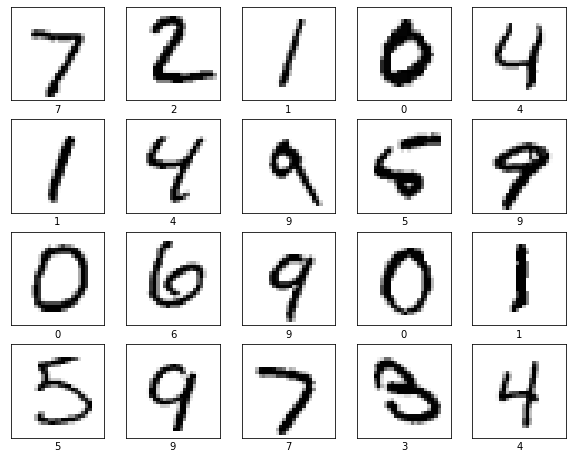

In [25]:
predictions = probability_model.predict(test_images)

print('MODEL PREDICTIONS ON TEST DATA:')
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]))

plt.show()
